<a href="https://colab.research.google.com/github/sahooabhipsa10/18CSE301J_RA2011003010346/blob/main/netflixEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #for plot graph visualizaion
import seaborn as sns
%matplotlib inline

In [6]:
raw = pd.read_csv("/content/drive/MyDrive/netflixEDA/netflix_titles.csv")

In [7]:
raw.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [8]:
raw.shape

(6234, 12)

In [10]:
raw_col = raw.columns
print(raw_col,"\n")

raw_data_info = raw.info()

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [11]:
#Check Duplicated Records
raw[raw.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [12]:
#Check Missing Values
missing_value_df = raw.isnull().sum()
print(missing_value_df)

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64


In [14]:
#Print Missing Value As Percentage / Column
raw_percent_missing_value = 100*(missing_value_df / len(raw.index))
percent_missing_value = round(raw_percent_missing_value,2)
print(percent_missing_value.sort_values(ascending=False))

director        31.58
cast             9.14
country          7.64
date_added       0.18
rating           0.16
show_id          0.00
type             0.00
title            0.00
release_year     0.00
duration         0.00
listed_in        0.00
description      0.00
dtype: float64


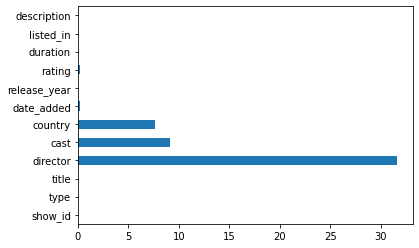

<Figure size 720x432 with 0 Axes>

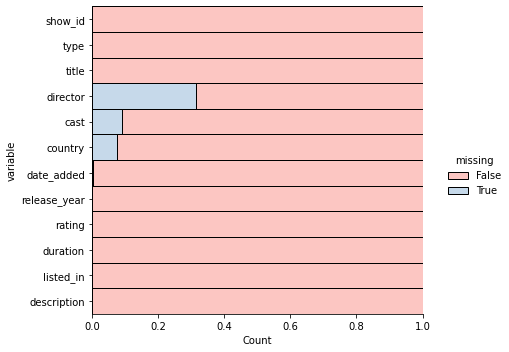

In [33]:
#Visualizing missing values
percent_missing_value.plot(kind='barh')
plt.figure(figsize=(10,6))
sns.displot(
    data=raw.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    palette="Pastel1",
    multiple="fill",
    aspect=1.25)

In [34]:
data = raw.copy()

In [18]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [19]:
# replace Missing Data on 3 Columns 

#   Country Replace with
#   Director Replace with "No Data"
#   Cast Replace with "No Data"
data['country'] = data['country'].fillna(data['country'].mode()[0])
data['cast'].replace(np.nan, 'No Data',inplace  = True)
data['director'].replace(np.nan, 'No Data',inplace  = True)
data.dropna(inplace=True)

#Drop Missing Data Records
#data.dropna(inplace=True)

In [20]:
#check on Data
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Data,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Data,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Data,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [21]:
#check missing values on data after cleansing
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [22]:
#Now look like Dataset is more clean , Then let's create new Column

#first let's change format of Column date_added to only datetime with "YYYY-MM-DD" Format
data['date_added'] = pd.to_datetime(data['date_added'])

#then split sub-values in Datetime of Column date_added out to Month(Month No.),Month(Full Month Name) and Year 
data['month_added']=data['date_added'].dt.month
data['month_name_added']=data['date_added'].dt.month_name()
data['year_added'] = data['date_added'].dt.year

In [23]:
# Now let's Show Dataset After create New Column
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,9,September,2019
1,80117401,Movie,Jandino: Whatever it Takes,No Data,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,9,September,2016
2,70234439,TV Show,Transformers Prime,No Data,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",9,September,2018
3,80058654,TV Show,Transformers: Robots in Disguise,No Data,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,9,September,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,9,September,2017


In [24]:
#Let's Check Data Type to Makesure
data.dtypes

show_id                      int64
type                        object
title                       object
director                    object
cast                        object
country                     object
date_added          datetime64[ns]
release_year                 int64
rating                      object
duration                    object
listed_in                   object
description                 object
month_added                  int64
month_name_added            object
year_added                   int64
dtype: object

In [25]:
#TV shows and movies were added on netflix , count group by 'year_added'
data['year_added'].value_counts()

2019    2349
2018    1781
2017    1297
2016     453
2020     184
2015      88
2014      25
2011      13
2013      12
2012       7
2009       2
2008       2
2010       1
Name: year_added, dtype: int64

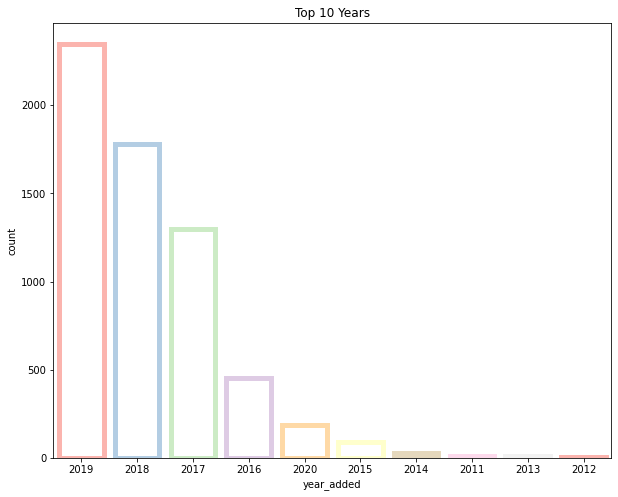

In [28]:
#Then let's plot to the Graph to show which year have most Movie and TV Show
plt.figure(figsize=(10,8))
plt.title('Top 10 Years')
sns.countplot(x='year_added',data=data,order=data['year_added'].value_counts().index[:10],facecolor=(0, 0, 0, 0),linewidth=5, edgecolor=sns.color_palette("Pastel1"))
plt.show()

In [36]:
data.groupby('type').type.count()

type
Movie      4265
TV Show    1969
Name: type, dtype: int64

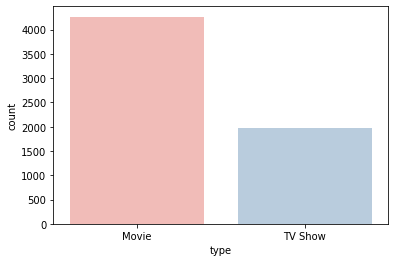

In [41]:
sns.countplot(x='type', data=data,palette="Pastel1")
plt.show()

In [43]:

data['country'].value_counts()[:10]

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

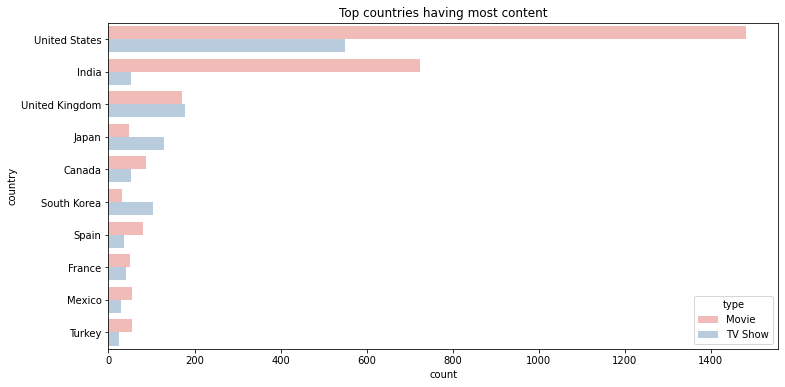

In [45]:
#Let's plot to the Graph

fig = plt.figure(figsize=(12,6))
sns.countplot(data = data,y = 'country', order = data["country"].value_counts().index[:10],hue = 'type',palette = 'Pastel1')
plt.title("Top countries having most content")
plt.show()

After Plot Graph Visualization

Look like Most Movie and TV Show is USA Followed by India , Which have Very difference ratio of Movie and TV Show
While UK almost have most balanced between Movie and TV Show
Japan And South Korean have TV Show more than Movie

In [46]:
# Start by Director
data['director'].value_counts()

Raúl Campos, Jan Suter         18
Marcus Raboy                   14
Jay Karas                      13
Jay Chapman                    12
Steven Spielberg                9
                               ..
Peter Mortimer, Josh Lowell     1
Greg Coolidge                   1
Owen Egerton                    1
Sam "Blitz" Bazawule            1
Onur Ünlü                       1
Name: director, Length: 3301, dtype: int64

In [47]:

director = data[data.director!='No Data'].set_index('title').director.str.split(",",expand=True).stack().reset_index(level=1,drop=True)


In [48]:
director

title
Norm of the North: King Sized Adventure            Richard Finn
Norm of the North: King Sized Adventure              Tim Maltby
#realityhigh                                   Fernando Lebrija
Automata                                            Gabe Ibáñez
Fabrizio Copano: Solo pienso en mi                 Rodrigo Toro
                                                   ...         
Miraculous: Tales of Ladybug & Cat Noir           Thomas Astruc
Sacred Games                               Vikramaditya Motwane
Sacred Games                                     Anurag Kashyap
Men on a Mission                                     Jung-ah Im
Leyla and Mecnun                                      Onur Ünlü
Length: 4852, dtype: object

In [49]:
#let's Count the Director
director.value_counts()

Raúl Campos             18
 Jan Suter              18
Marcus Raboy            14
Jay Karas               14
Jay Chapman             12
                        ..
 Josh Lowell             1
Greg Coolidge            1
Owen Egerton             1
Sam "Blitz" Bazawule     1
Onur Ünlü                1
Length: 3736, dtype: int64

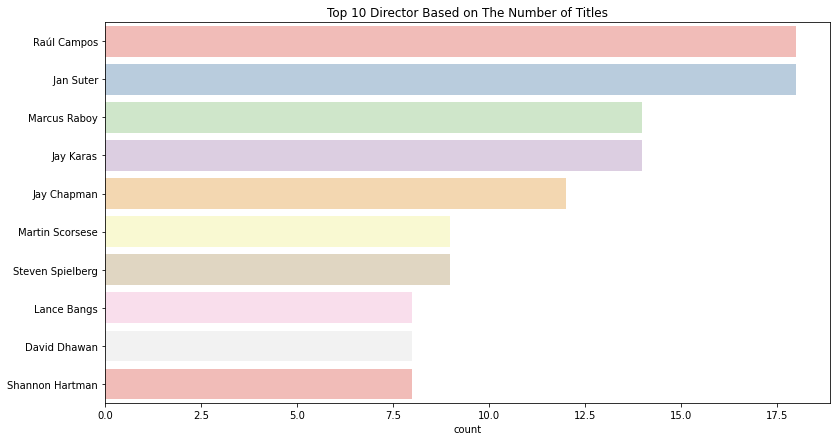

In [52]:
plt.figure(figsize=(13,7))
sns.countplot(y = director, order=director.value_counts().index[:10], palette='Pastel1')
plt.title('Top 10 Director Based on The Number of Titles')
plt.show()

Look at this visualization

we will saw it's match with out count (Of course!)
Lowest is '1' and Highest is '22'

In [53]:
#df for TV shows and Movies
tv_shows = data[data.type == 'TV Show'].copy()
movie = data[data.type == 'Movie'].copy()

In [54]:
tv_shows['cast'].value_counts()

David Attenborough                                                                                                                                                                                                                                                                                                                                                                                                                                                 14
Michela Luci, Jamie Watson, Anna Claire Bartlam, Dante Zee, Eric Peterson                                                                                                                                                                                                                                                                                                                                                                                           4
Morgan Freeman                                                                              

In [55]:
movie['cast'].value_counts()

Samuel West                                                                                                                                     10
Jeff Dunham                                                                                                                                      7
Craig Sechler                                                                                                                                    6
Bill Burr                                                                                                                                        5
Jim Gaffigan                                                                                                                                     5
                                                                                                                                                ..
Paco León, Alexandra Jiménez, Rossy de Palma, Nuria Herrero, Adrián Lastra, Oscar Martínez, Inma Cuevas, Ana Rujas, Ca

In [57]:
# then use same method that's we use in Director name split
cast_tv = tv_shows[tv_shows.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
cast_m = movie[movie.cast!='No Data'].set_index('title').cast.str.split(",",expand=True).stack().reset_index(level=1,drop=True)

In [58]:
# Count Cast that play TV Show 
cast_tv.value_counts()

 Takahiro Sakurai         18
David Attenborough        14
 Yuki Kaji                14
 Tomokazu Sugita          12
 Ai Kayano                11
                          ..
 Anne-Laure Vandeputte     1
 Dirk Roofthooft           1
 Anemone Valcke            1
Mandy Wei                  1
 Matthew Perry             1
Length: 11870, dtype: int64

In [59]:
# Count Cast that play Movie
cast_m.value_counts()

 Anupam Kher       29
 Om Puri           25
Shah Rukh Khan     24
 Boman Irani       23
 Paresh Rawal      22
                   ..
Warren Christie     1
 Lloyd Owen         1
 Ryan Robbins       1
Cheng Pei-pei       1
Jeremy Scott        1
Length: 20165, dtype: int64

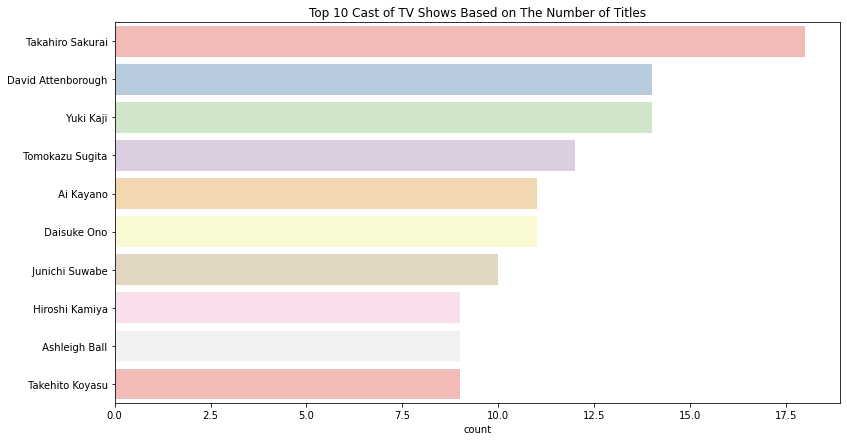

In [61]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast_tv, order=cast_tv.value_counts().index[:10], palette='Pastel1')
plt.title('Top 10 Cast of TV Shows Based on The Number of Titles')
plt.show()

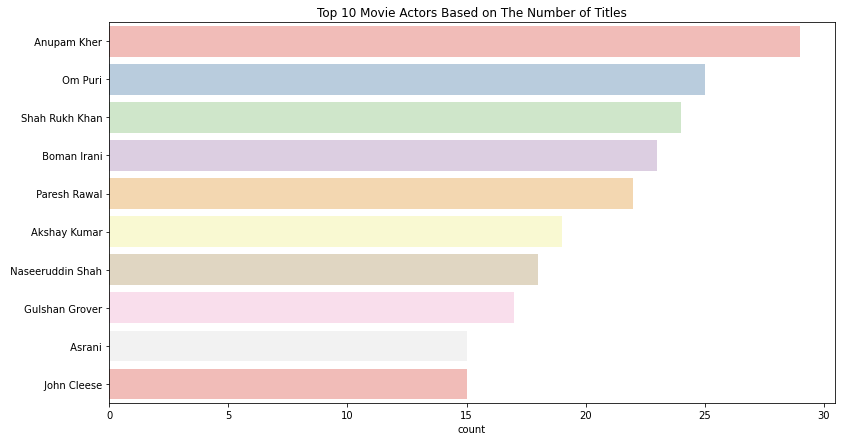

In [62]:
plt.figure(figsize=(13,7))
sns.countplot(y = cast_m, order=cast_m.value_counts().index[:10], palette='Pastel1')
plt.title('Top 10 Movie Actors Based on The Number of Titles')
plt.show()

Yeah , Now we have Top 10 Case of TV Show and Movie , because we don't have Cast Country Attribute , then all we can do is guest by name

First Look like Most Cast on TV Show side are 'ASIAN'
And Most Case on Movie are 'India' Judge by the name

In [70]:
# let's check on Dataframe first
movie.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [71]:
# let's count movie duration
movie['duration'].value_counts()

90     111
91     104
92     101
95      94
94      94
      ... 
205      1
37       1
182      1
201      1
195      1
Name: duration, Length: 186, dtype: int64

In [72]:
tv_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,season,listed_in,description
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,NaN,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",NaN,"September 7, 2018",2015,TV-14,1,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


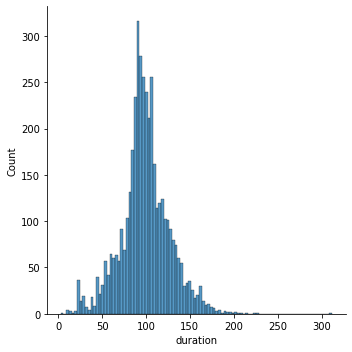

In [85]:
# Duration of Movie
sns.displot(data=movie,x='duration',bins=100)

Most Duration of Movies is Around 90-97 Mins 
* 90 min     152
* 94 min     146
* 93 min     146
* 97 min     146
* 91 min     144

<AxesSubplot:>

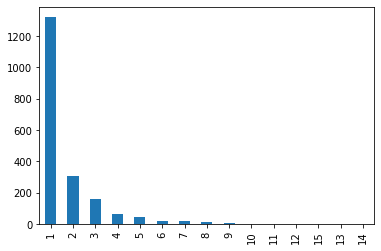

In [87]:
tv_shows['season'].value_counts().plot(kind='bar')

Most Season of TV Seasons is 1 Season

In [79]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [80]:
# Let's split word for Analysing genre of content by create new dataframe
genre = data.set_index('title').listed_in.str.split(",",expand=True).stack().reset_index(level=1,drop=True)
# set-index to 'title'
# column 'listed_in' split word in side them (same case as director and cast)

In [81]:
# Let's take a look at new dataframe
genre.head()

title
Norm of the North: King Sized Adventure    Children & Family Movies
Norm of the North: King Sized Adventure                    Comedies
Jandino: Whatever it Takes                          Stand-Up Comedy
Transformers Prime                                         Kids' TV
Transformers: Robots in Disguise                           Kids' TV
dtype: object

In [82]:
# let's count a little bit
genre.value_counts()

 International Movies        1842
Dramas                       1077
Comedies                      803
Documentaries                 644
Action & Adventure            597
                             ... 
 Classic & Cult TV              5
Romantic Movies                 2
Spanish-Language TV Shows       1
Sports Movies                   1
TV Sci-Fi & Fantasy             1
Length: 72, dtype: int64

> Now we see the number 1 Genre , now let's plot

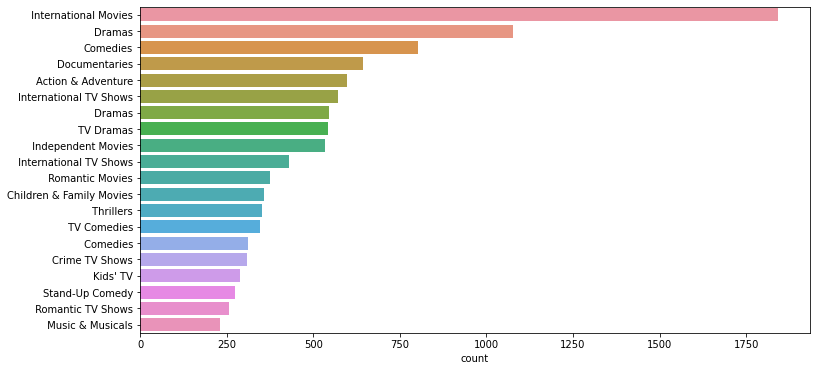

In [83]:
# Plot only Top 20
plt.figure(figsize=(12,6))
sns.countplot(y = genre, order=genre.value_counts().index[:20])
plt.show()